# **WeatherPy**

### **Importing Dependancies**

In [81]:
import gzip
import csv
import json
import pandas as pd
import random
import math
import numpy as np
from random import uniform
import matplotlib.pyplot as plt

import matplotlib

# Set style for plots
plt.style.use("seaborn")

In [82]:
import requests as req
from citipy import citipy

In [83]:
lats = np.random.uniform(low=-90.000, high=90.000, size=500)
longs = np.random.uniform(low=-180.000, high=180.000, size=500)
cities=[]

In [84]:
for lat, long in zip(lats, longs):
    #print(lat,lang)
    cities.append(citipy.nearest_city(lat, long).city_name)


In [85]:
api_key = "c7f9f57b4779391ea1f5ae067591c971"
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = url + "appid=" + api_key + "&units=" + units + "&q="

#city = "London"
weather_data=[]

### **Generating URL**

In [ ]:

for city in cities:
    try:
        #print("*",city,"*")
        #print(url + "appid=" + api_key + "&units=" + units + "&q=" + city)
        weather_data.append(req.get(query_url + city).json())
    except:
        print('error')

#for data in weather_data:
    #print(data.get('main').get('temp_max'))
#weather_data[2]

### **Setting variables**

In [56]:

temperature = [x for x in [data.get("main",{}).get("temp") for data in weather_data] if x is not None]
pressure = [x for x in [data.get("main",{}).get("pressure") for data in weather_data] if x is not None]
humidity = [x for x in [data.get("main",{}).get("humidity") for data in weather_data] if x is not None]
cloudiness=  [x for x in [data.get("clouds",{}).get("all") for data in weather_data] if x is not None]
wind_speed = [x for x in [data.get("wind",{}).get("speed") for data in weather_data] if x is not None]
latitude = [x for x in [data.get("coord",{}).get("lat") for data in weather_data] if x is not None]
Longitude = [x for x in [data.get("coord",{}).get("lon") for data in weather_data] if x is not None]
City_1 = [x for x in [data.get("name") for data in weather_data] if x is not None]
country = [x for x in [data.get("sys",{}).get("country") for data in weather_data] if x is not None]
#for temp,pre in zip(temperature,pressure):
 #   print(temp,pre)
#temperature = [x for x in temperature if x is not None]
#print(temperature)

In [64]:
citi_df = pd.DataFrame({"City":City_1,"Country":country,"lat":latitude,"long":Longitude,"Temperature":temperature,
                       "Pressure":pressure,"Humidity":humidity,"Cloudiness":cloudiness,
                        "Wind Speed":wind_speed
                       })
citi_df.set_index('City')
citi_df.head()

,City,Cloudiness,Country,Humidity,Pressure,Temperature,Wind Speed,lat,long
0,Castro,44,CL,100,1015.91,8.76,1.33,-42.48,-73.76
1,Hilo,90,US,88,1019.00,15.96,3.60,19.71,-155.08
2,Vaini,0,IN,28,959.74,32.03,1.93,15.34,74.49
3,Rikitea,92,PF,100,1032.94,27.16,8.43,-23.12,-134.97
4,Kodiak,1,US,74,1028.00,-1.00,1.33,39.95,-94.76
5,Salinas,90,US,66,1013.00,11.49,3.10,36.67,-121.66
6,Sisimiut,32,GL,80,1019.64,-14.17,1.03,66.94,-53.67
7,Cape Town,0,ZA,68,1014.00,18.00,3.10,-33.93,18.42
8,Guaruja,0,BR,83,1018.00,22.00,1.00,-23.99,-46.26
9,Hobart,40,AU,56,1011.00,21.00,4.60,-42.88,147.33


### ** Plot settings**

In [62]:
def set_plot_prop(x_title,x_lim,y_title):
    plt.title(f"{y_title} vs {x_title}")
    plt.ylabel(y_title)
    plt.xlabel(x_title)
    plt.grid(True)
    plt.xlim(x_lim)

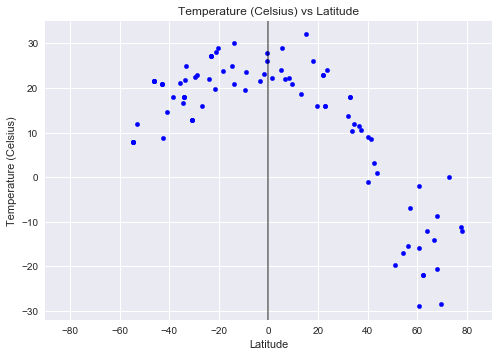

In [65]:
citi_df.plot(kind="scatter",x="lat",y="Temperature",grid=True,color="blue")
set_plot_prop("Latitude",[-90,90],"Temperature (Celsius)")
plt.axvline(0, color='black',alpha=0.5)
plt.savefig("Temperature vs Latitude")
plt.show()

### **Temperature vs Humidity**

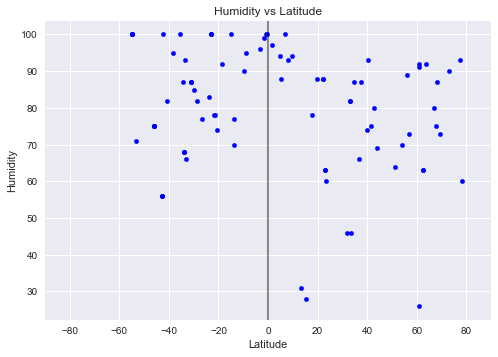

In [68]:
citi_df.plot(kind="scatter",x="lat",y="Humidity",grid=True,color="blue")
set_plot_prop("Latitude",[-90,90],"Humidity")
plt.axvline(0, color='black',alpha=0.5)
plt.savefig("Temperature vs Humidity")
plt.show()

### **Cloudiness (%) vs. Latitude**

In [76]:
citi_df.plot(kind="scatter",x="lat",y="Cloudiness",grid=True,color="blue")

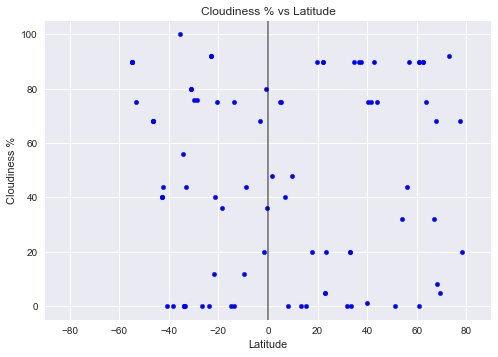

In [77]:
set_plot_prop("Latitude",[-90,90],"Cloudiness %")
plt.axvline(0, color='black',alpha=0.5)
plt.savefig("Cloudiness % vs Latitude")
plt.show()

### **Wind Speed(MPH) vs Latitude**

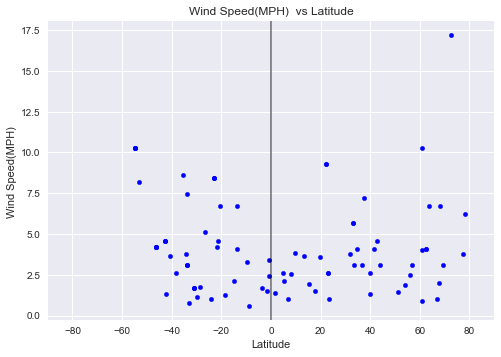

In [80]:
citi_df.plot(kind="scatter",x="lat",y="Wind Speed",grid=True,color="blue")
set_plot_prop("Latitude",[-90,90],"Wind Speed(MPH) ")
plt.axvline(0, color='black',alpha=0.5)
plt.savefig("Wind Speed(MPH) vs Latitude")
plt.show()